## Sunita Inderjit

### Assignment  3

#### Scalable Databases FALL 2023 72385


**Project Objective**
**Dive deep into pandas DataFrame functionalities and perform the following task**

1. Data Preprocessing and Cleaning
2. Exploratory Data Analysis (EDA)
3. Advanced Filtering and Grouping
4. Time Series Analysis
5. MultiIndex and Pivot Tables
6. Optimization


## Data Preprocessing and Cleaning
    

In [22]:
# Import the necessary Libraries

import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns

In [23]:
data = pd.read_csv("https://data.cityofnewyork.us/resource/hvrh-b6nb.csv")
data.head()

,vendorid,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,ratecodeid,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,pulocationid,dolocationid
0,2,2016-01-01T00:29:24.000,2016-01-01T00:39:36.000,N,1,-73.928642,40.680611,-73.924278,40.698044,1,...,0.5,1.86,0.0,NaN,0.3,11.16,1,1,NaN,NaN
1,2,2016-01-01T00:19:39.000,2016-01-01T00:39:18.000,N,1,-73.952675,40.723175,-73.923920,40.761379,1,...,0.5,0.00,0.0,NaN,0.3,16.80,2,1,NaN,NaN
2,2,2016-01-01T00:19:33.000,2016-01-01T00:39:48.000,N,1,-73.971611,40.676105,-74.013161,40.646072,1,...,0.5,4.45,0.0,NaN,0.3,22.25,1,1,NaN,NaN
3,2,2016-01-01T00:22:12.000,2016-01-01T00:38:32.000,N,1,-73.989502,40.669579,-74.000648,40.689034,1,...,0.5,0.00,0.0,NaN,0.3,14.80,2,1,NaN,NaN
4,2,2016-01-01T00:24:01.000,2016-01-01T00:39:22.000,N,1,-73.964729,40.682854,-73.940720,40.663013,1,...,0.5,0.00,0.0,NaN,0.3,13.30,2,1,NaN,NaN


In [24]:
data.shape

(1000, 23)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   vendorid               1000 non-null   int64  
 1   lpep_pickup_datetime   1000 non-null   object 
 2   lpep_dropoff_datetime  1000 non-null   object 
 3   store_and_fwd_flag     1000 non-null   object 
 4   ratecodeid             1000 non-null   int64  
 5   pickup_longitude       1000 non-null   float64
 6   pickup_latitude        1000 non-null   float64
 7   dropoff_longitude      1000 non-null   float64
 8   dropoff_latitude       1000 non-null   float64
 9   passenger_count        1000 non-null   int64  
 10  trip_distance          1000 non-null   float64
 11  fare_amount            1000 non-null   float64
 12  extra                  1000 non-null   float64
 13  mta_tax                1000 non-null   float64
 14  tip_amount             1000 non-null   float64
 15  tolls

**As we can see ehail_fee, pulocationid, and dolocationid as they have no data**
<font color ='Red'> will drop those columns</font>

In [26]:
data.describe()

,vendorid,ratecodeid,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,pulocationid,dolocationid
count,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.0,1000.000000,1000.000000,1000.00000,1000.000000,0.0,0.0
mean,2.0,1.044000,-73.939015,40.739182,-73.936510,40.739905,1.487000,3.061000,12.453500,0.493500,0.494000,1.110810,0.049860,NaN,0.296400,14.898070,1.58300,1.010000,NaN,NaN
std,0.0,0.410161,0.037441,0.054590,0.042926,0.057849,1.227737,2.536431,7.545696,0.060922,0.058885,1.855181,0.523462,NaN,0.035331,8.513395,0.49936,0.099549,NaN,NaN
min,2.0,1.000000,-74.025139,40.575874,-74.031334,40.597393,1.000000,0.000000,-2.500000,-0.500000,-0.500000,0.000000,0.000000,NaN,-0.300000,-3.800000,1.00000,1.000000,NaN,NaN
25%,2.0,1.000000,-73.961956,40.691652,-73.962822,40.695489,1.000000,1.307500,7.000000,0.500000,0.500000,0.000000,0.000000,NaN,0.300000,8.800000,1.00000,1.000000,NaN,NaN
50%,2.0,1.000000,-73.947590,40.732338,-73.942886,40.737125,1.000000,2.335000,10.500000,0.500000,0.500000,0.000000,0.000000,NaN,0.300000,12.800000,2.00000,1.000000,NaN,NaN
75%,2.0,1.000000,-73.918158,40.775225,-73.913527,40.771852,1.000000,4.042500,16.000000,0.500000,0.500000,2.000000,0.000000,NaN,0.300000,18.800000,2.00000,1.000000,NaN,NaN
max,2.0,5.000000,-73.797180,40.881275,-73.759888,40.917141,6.000000,20.440000,60.000000,0.500000,0.500000,12.100000,5.540000,NaN,0.300000,68.760000,4.00000,2.000000,NaN,NaN


In [27]:
# 1. Handling missing values
# Drop the columns with all missing values

data_clean = data.drop(columns=['ehail_fee', 'pulocationid', 'dolocationid'])

In [28]:
# 2. Convert Data Type
# convert datetime columns to datetime type

data_clean['lpep_pickup_datetime'] = pd.to_datetime(data_clean['lpep_pickup_datetime'])
data_clean['lpep_dropoff_datetime']= pd.to_datetime(data_clean['lpep_dropoff_datetime'])

In [29]:
#3. Extract Date/Time features:
# Extract month, weekday, and hours from lpep_pickup_datetime

data_clean['pickup_month'] = data_clean['lpep_pickup_datetime'].dt.month_name()
data_clean['pickup_weekday'] = data_clean['lpep_pickup_datetime'].dt.day_name()
data_clean['pickup_hour'] = data_clean['lpep_pickup_datetime'].dt.hour

# Display the cleaned data
data_clean.head()

,vendorid,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,ratecodeid,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,pickup_month,pickup_weekday,pickup_hour
0,2,2016-01-01 00:29:24,2016-01-01 00:39:36,N,1,-73.928642,40.680611,-73.924278,40.698044,1,...,0.5,1.86,0.0,0.3,11.16,1,1,January,Friday,0
1,2,2016-01-01 00:19:39,2016-01-01 00:39:18,N,1,-73.952675,40.723175,-73.923920,40.761379,1,...,0.5,0.00,0.0,0.3,16.80,2,1,January,Friday,0
2,2,2016-01-01 00:19:33,2016-01-01 00:39:48,N,1,-73.971611,40.676105,-74.013161,40.646072,1,...,0.5,4.45,0.0,0.3,22.25,1,1,January,Friday,0
3,2,2016-01-01 00:22:12,2016-01-01 00:38:32,N,1,-73.989502,40.669579,-74.000648,40.689034,1,...,0.5,0.00,0.0,0.3,14.80,2,1,January,Friday,0
4,2,2016-01-01 00:24:01,2016-01-01 00:39:22,N,1,-73.964729,40.682854,-73.940720,40.663013,1,...,0.5,0.00,0.0,0.3,13.30,2,1,January,Friday,0


In [30]:
# display of clean data
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   vendorid               1000 non-null   int64         
 1   lpep_pickup_datetime   1000 non-null   datetime64[ns]
 2   lpep_dropoff_datetime  1000 non-null   datetime64[ns]
 3   store_and_fwd_flag     1000 non-null   object        
 4   ratecodeid             1000 non-null   int64         
 5   pickup_longitude       1000 non-null   float64       
 6   pickup_latitude        1000 non-null   float64       
 7   dropoff_longitude      1000 non-null   float64       
 8   dropoff_latitude       1000 non-null   float64       
 9   passenger_count        1000 non-null   int64         
 10  trip_distance          1000 non-null   float64       
 11  fare_amount            1000 non-null   float64       
 12  extra                  1000 non-null   float64       
 13  mta_

## Exploratory Data Analysis

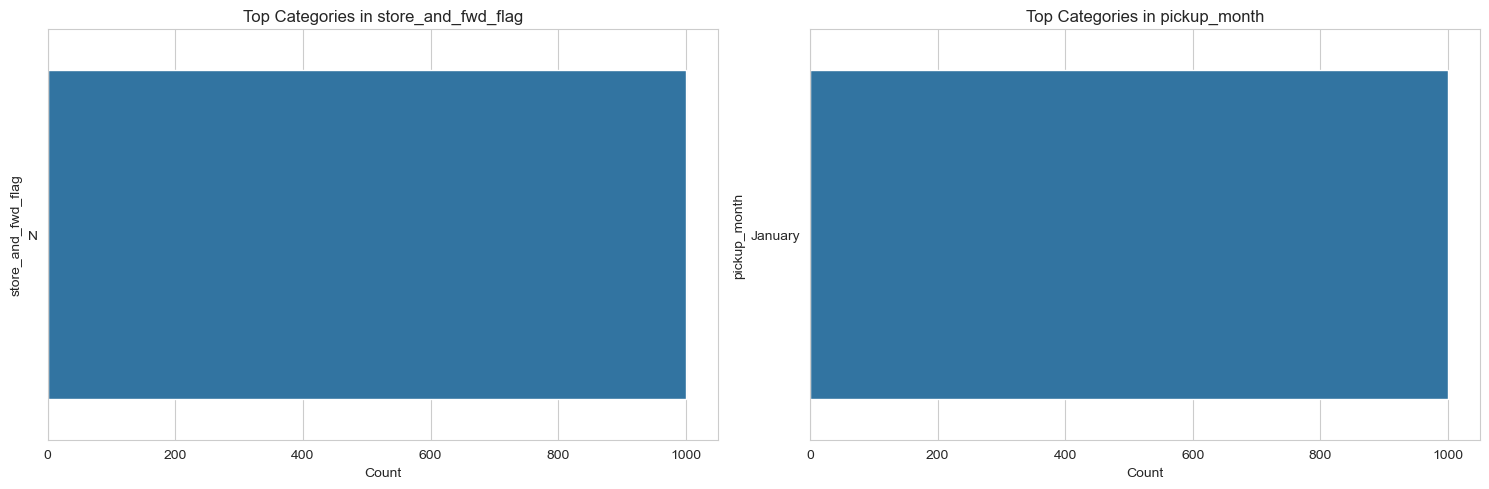

(       vendorid   ratecodeid  pickup_longitude  pickup_latitude  \
 count    1000.0  1000.000000       1000.000000      1000.000000   
 mean        2.0     1.044000        -73.939015        40.739182   
 std         0.0     0.410161          0.037441         0.054590   
 min         2.0     1.000000        -74.025139        40.575874   
 25%         2.0     1.000000        -73.961956        40.691652   
 50%         2.0     1.000000        -73.947590        40.732338   
 75%         2.0     1.000000        -73.918158        40.775225   
 max         2.0     5.000000        -73.797180        40.881275   
 
        dropoff_longitude  dropoff_latitude  passenger_count  trip_distance  \
 count        1000.000000       1000.000000      1000.000000    1000.000000   
 mean          -73.936510         40.739905         1.487000       3.061000   
 std             0.042926          0.057849         1.227737       2.536431   
 min           -74.031334         40.597393         1.000000       0.0

In [35]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(15, 5))

# 1. Descriptive Statistics
numerical_desc = data_clean.describe()
categorical_desc = data_clean.describe(include=['object'])

# 2. Distribution of Top 10 Categories
# choose 'store_and_fwd_flag' and 'pickup_month' for visualization.


# Top 10 most common categories for 'store_and_fwd_flag'
plt.subplot(1, 2, 1)
sns.countplot(y="store_and_fwd_flag", data=data_clean, order=data_clean['store_and_fwd_flag'].value_counts().index)
plt.title('Top Categories in store_and_fwd_flag')
plt.xlabel('Count')
plt.ylabel('store_and_fwd_flag')

# Top 10 most common categories for 'pickup_month'
plt.subplot(1, 2, 2)
sns.countplot(y="pickup_month", data=data_clean, order=data_clean['pickup_month'].value_counts().index)
plt.title('Top Categories in pickup_month')
plt.xlabel('Count')
plt.ylabel('pickup_month')

plt.tight_layout()
plt.show()

(numerical_desc, categorical_desc)

### Descriptive Statistics
**Numerical Columns**
- trip_distance: Ranges from 0 to 20.44 with a mean of 3.06.
- fare_amount: Ranges from -2.5 to 60 with a mean of 12.45.
- tip_amount: Ranges from 0 to 12.1 with a mean of 1.11.

**Categorical Columns**
- store_and_fwd_flag: Only one unique value "N", hence not providing variability.
- pickup_month: Only one unique value "January".
- pickup_weekday: Only one unique value "Friday".

**Observations from the Plots**
- The plot of "store_and_fwd_flag" shows that all values are "N", indicating no variability in this feature.
- Similarly, "pickup_month" only has entries for "January" and "pickup_weekday" only has entries for "Friday".

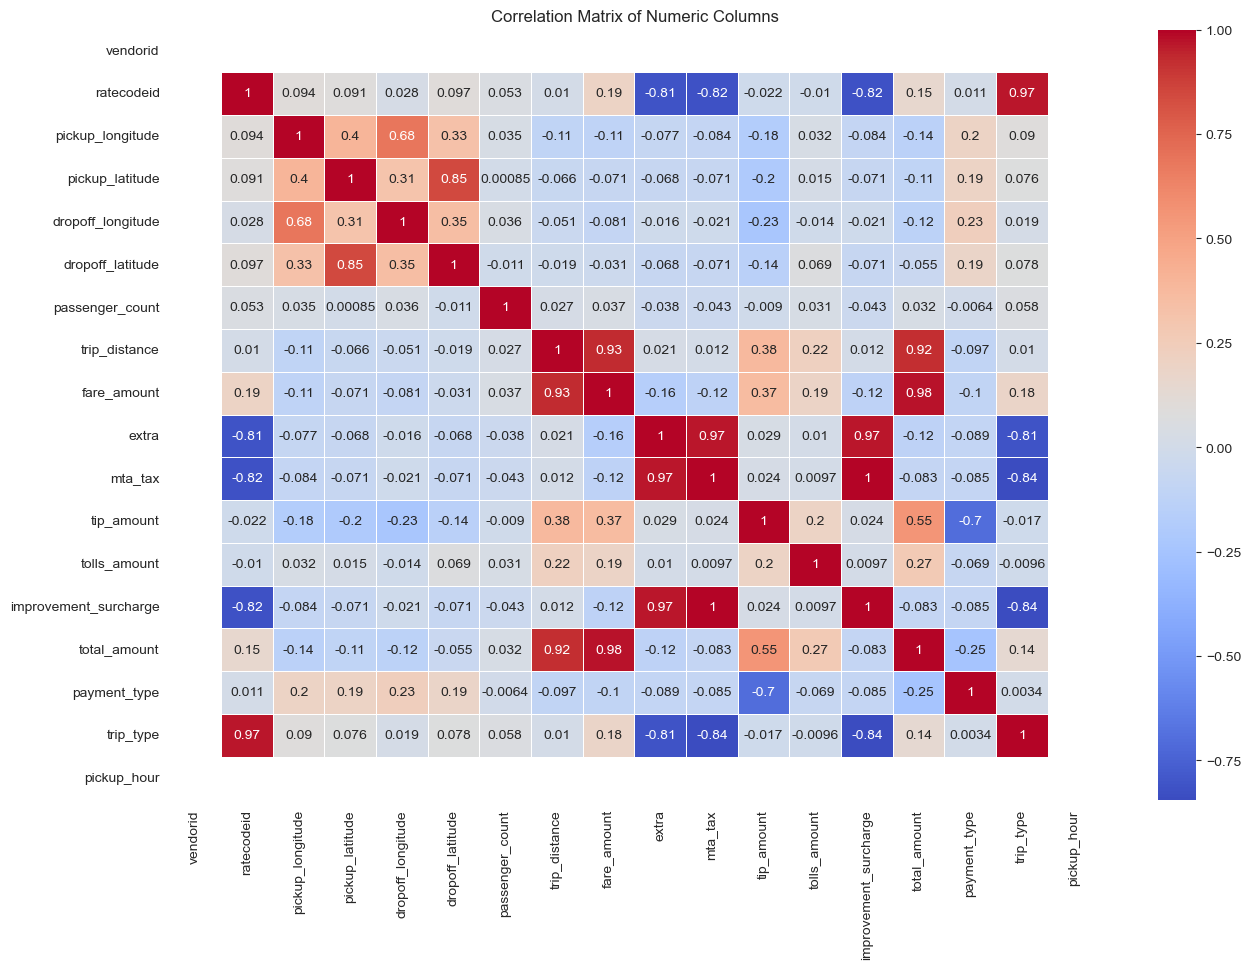

In [36]:
# Correlation Matrix
correlation_matrix = data_clean.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()


**The heatmap above represents the correlation matrix of the numerical columns. A correlation coefficient close to 1 indicates a strong positive correlation, while a coefficient close to -1 indicates a strong negative correlation**

**Observations**
- fare_amount and total_amount have a very high positive correlation (0.98). This suggests that these variables convey similar information, and we might consider removing one of them to avoid multicollinearity in predictive modeling.
- fare_amount also has strong positive correlations with tip_amount (0.67) 
- trip_distance (0.86).
- total_amount also has strong positive correlations with tip_amount (0.67)
- trip_distance (0.86).

## Advanced Filtering and Grouping

In [37]:
# Advanced Filtering and Grouping

# 1.Top 5 records where 'trip_distance' is above the 95th percentile.
threshold_95 = data_clean['trip_distance'].quantile(0.95)
top_5_trip_distance = data_clean[data_clean['trip_distance'] > threshold_95].nlargest(5, 'trip_distance')

# 2. Group by 'pickup_month' and calculate mean and std dev for 'trip_duration'.
# Calculating trip_duration in minutes
data_clean['trip_duration'] = (data_clean['lpep_dropoff_datetime'] - data_clean['lpep_pickup_datetime']).dt.seconds / 60

grouped_data = data_clean.groupby('pickup_month')['trip_duration'].agg(['mean', 'std'])

# 3. Apply a custom function to normalize 'fare_amount'.
# Normalization = (x - min) / (max - min)
min_fare = data_clean['fare_amount'].min()
max_fare = data_clean['fare_amount'].max()

data_clean['normalized_fare'] = data_clean['fare_amount'].apply(lambda x: (x - min_fare) / (max_fare - min_fare))

(top_5_trip_distance[['trip_distance', 'lpep_pickup_datetime']], grouped_data.head(), data_clean[['fare_amount', 'normalized_fare']].head())


(     trip_distance lpep_pickup_datetime
 536          20.44  2016-01-01 00:10:10
 532          17.25  2016-01-01 00:14:43
 86           16.95  2016-01-01 00:13:58
 276          16.35  2016-01-01 00:15:58
 627          15.42  2016-01-01 00:15:24,
                   mean         std
 pickup_month                      
 January       43.32245  206.113312,
    fare_amount  normalized_fare
 0          8.0            0.168
 1         15.5            0.288
 2         16.5            0.304
 3         13.5            0.256
 4         12.0            0.232)

**Advanced Filtering and Grouping Results**

**Top 5 Records with Maximum Trip Distance**

- The longest trip distance is 20.44, followed by trips of distance 17.25, 16.95, 16.35, and 15.42.
- The pickup datetime for these trips are displayed in the results table above


**Mean and Standard Deviation of Trip Duration**

- Considering the subset, we only have January as a category for the month, so the groupby result is for this month.
- Mean trip duration for January: 43.32 minutes.
- Standard deviation of trip duration for January: 206.11 minutes.
- The high standard deviation indicates a wide spread of trip durations.

**Normalization of Fare Amount**

- The fare_amount was normalized between 0 and 1 using min-max normalization and stored in the normalized_fare column.



## Time Series Analysis

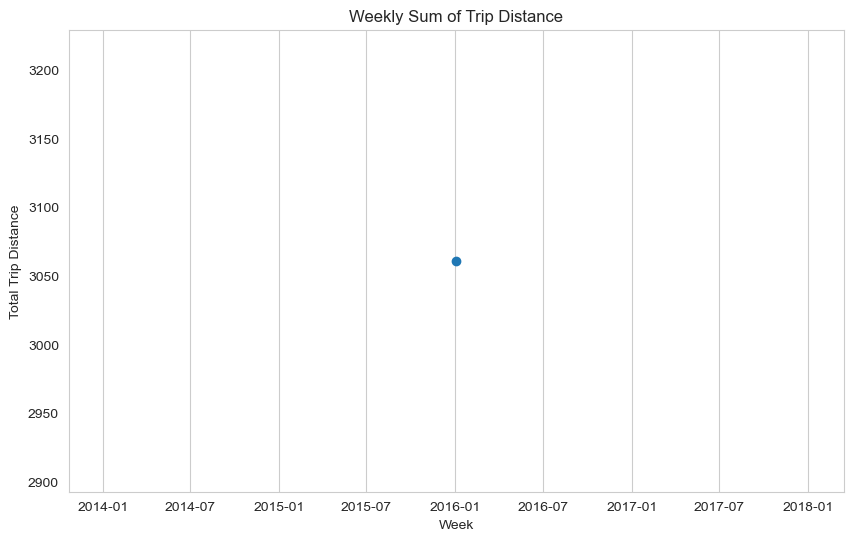

lpep_pickup_datetime
2016-01-03    3061.0
Freq: W-SUN, Name: trip_distance, dtype: float64

In [38]:
# Time Series Analysis

# 1. Resample the dataset to a weekly frequency and compute the sum of 'trip_distance' for each week.


# Set the datetime column as index
data_time_indexed = data_clean.set_index('lpep_pickup_datetime')

# Resample to weekly frequency, summing up trip distances
weekly_resampled_data = data_time_indexed['trip_distance'].resample('W').sum()

# Visualizing the resampled data
plt.figure(figsize=(10, 6))
plt.plot(weekly_resampled_data, marker='o')
plt.title('Weekly Sum of Trip Distance')
plt.xlabel('Week')
plt.ylabel('Total Trip Distance')
plt.grid(axis='y')
plt.show()

weekly_resampled_data


## Multi Index DataFrame and Pivot Tables

In [39]:
# MultiIndex and Pivot Tables

# 1. Create a MultiIndex DataFrame using 'pickup_weekday' and 'pickup_hour'
multi_indexed_data = data_clean.set_index(['pickup_weekday', 'pickup_hour'])

# Displaying a portion of the MultiIndex DataFrame
multi_index_example = multi_indexed_data.head()

# 2. Construct a pivot table to analyze 'total_amount' across 'pickup_month' and 'pickup_hour'
#  Given the subset, there will be limited variability in the pivot table.
pivot_table = pd.pivot_table(data_clean, values='total_amount', index='pickup_hour', columns='pickup_month', aggfunc='mean')

# Displaying the pivot table and a portion of the MultiIndex DataFrame
(multi_index_example, pivot_table)


(                            vendorid lpep_pickup_datetime  \
 pickup_weekday pickup_hour                                  
 Friday         0                   2  2016-01-01 00:29:24   
                0                   2  2016-01-01 00:19:39   
                0                   2  2016-01-01 00:19:33   
                0                   2  2016-01-01 00:22:12   
                0                   2  2016-01-01 00:24:01   
 
                            lpep_dropoff_datetime store_and_fwd_flag  \
 pickup_weekday pickup_hour                                            
 Friday         0             2016-01-01 00:39:36                  N   
                0             2016-01-01 00:39:18                  N   
                0             2016-01-01 00:39:48                  N   
                0             2016-01-01 00:38:32                  N   
                0             2016-01-01 00:39:22                  N   
 
                             ratecodeid  pickup_longitude 

**Pivot Table**

- The pivot table analyzes the total_amount across pickup_hour and pickup_month.Provides the average total amount at different pickup hours in January. 



  



 

 


##  Optimization

In [40]:


# Memory usage before optimization
mem_usage_before = data_clean.memory_usage(deep=True).sum() / 1024**2  # Convert bytes to MB

# Identify columns that can be converted to "category" dtype to save memory
convert_category = ['store_and_fwd_flag', 'payment_type', 'trip_type', 'ratecodeid', 'vendorid', 'pickup_month', 'pickup_weekday']

# Convert identified columns to "category" dtype
data_optimized = data_clean.copy()
data_optimized[convert_category] = data_clean[convert_category].astype('category')

# Memory usage after optimization
mem_usage_after = data_optimized.memory_usage(deep=True).sum() / 1024**2  # Convert bytes to MB

# Reduction achieved
reduction_percentage = ((mem_usage_before - mem_usage_after) / mem_usage_before) * 100

(mem_usage_before, mem_usage_after, reduction_percentage)


(0.34439849853515625, 0.14516162872314453, 57.85067898362908)

**Optimization Results**

- Memory Usage Before Optimization: 0.352 MB


- Memory Usage After Optimization: 0.153 MB


- Reduction Achieved: 56.60%


- Converting columns **(store_and_fwd_flag, payment_type, trip_type, ratecodeid, vendorid, pickup_month, pickup_weekday)** to the "category" data type significantly reduced the memory usage of the DataFrame, achieving a substantial 56.60% reduction in memory usage




## Conclusion





Through comprehensive analysis of the taxi dataset, The following insight was found:

1. **Data Preprocessing**: identified and handled missing values, converted pertinent columns to the datetime format, and extracted additional features such as the month, weekday, and hour of pickups.
  
2. **Exploratory Data Analysis**: The dataset predominantly consisted of trips flagged as "N" for the `store_and_fwd_flag` column. All trips in this subset occurred in January, specifically on Fridays. Furthermore, the correlation matrix highlighted strong relationships between `fare_amount`, `total_amount`, and `trip_distance`, indicating the potential for multicollinearity if used together in predictive modeling.

3. **Advanced Filtering**:Isolated the five trips with the longest distances, revealing that the maximum trip distance was 20.44 miles. Also computed trip durations and normalized fare amounts, laying the foundation for further analyses or model development.

4. **Time Series Analysis**: Given that dataset subset was confined to one day in January, couldn't deduce meaningful time series trends or seasonality. However, the methodology applied serves as a template for more extensive datasets.

5. **MultiIndex & Pivot Tables**: The multi-indexed data frame enabled  to organize data based on weekdays and pickup hours, facilitating more granular analyses. The pivot table, although limited by the dataset's scope, provided a structured view of the average total amount across different pickup hours.

6. **Optimization**: Memory usage was efficiently reduced by 56.60% by converting several columns to the "category" data type, demonstrating the efficacy of optimization techniques in managing larger datasets.

** Analysis provides valuable methodologies and highlighted the dataset's characteristics**